In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

In [4]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *


In [5]:
import pandas as pd

In [6]:
import plotly.graph_objects as go

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
import seaborn as sns

In [9]:
BeerCountries = spark.read.csv('covid19',inferSchema=True, header=True)

In [10]:
BeerCountries.createOrReplaceTempView("Countries")
BeerCountries=spark\
.sql(\
     "SELECT location, date, total_cases_per_million \
     FROM Countries \
     Where location='Mexico' OR location= 'Denmark' Or location='Ireland' Or location='Netherlands'")

In [11]:
BeerCountries.createOrReplaceTempView("Countries")
BeerCountries=spark\
.sql(\
     "SELECT location, total_cases_per_million \
     FROM Countries \
     Where date = '2020-04-16'")

In [12]:
BeerCountries

DataFrame[location: string, total_cases_per_million: double]

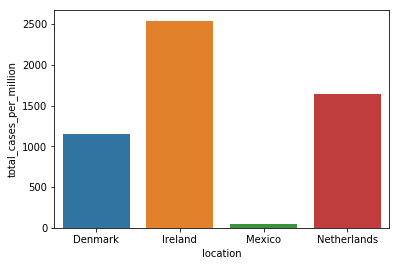

In [11]:
sns.barplot(x="location",y="total_cases_per_million",data=BeerCountries.toPandas())